# **🍽️ Restaurant Tips Analysis**

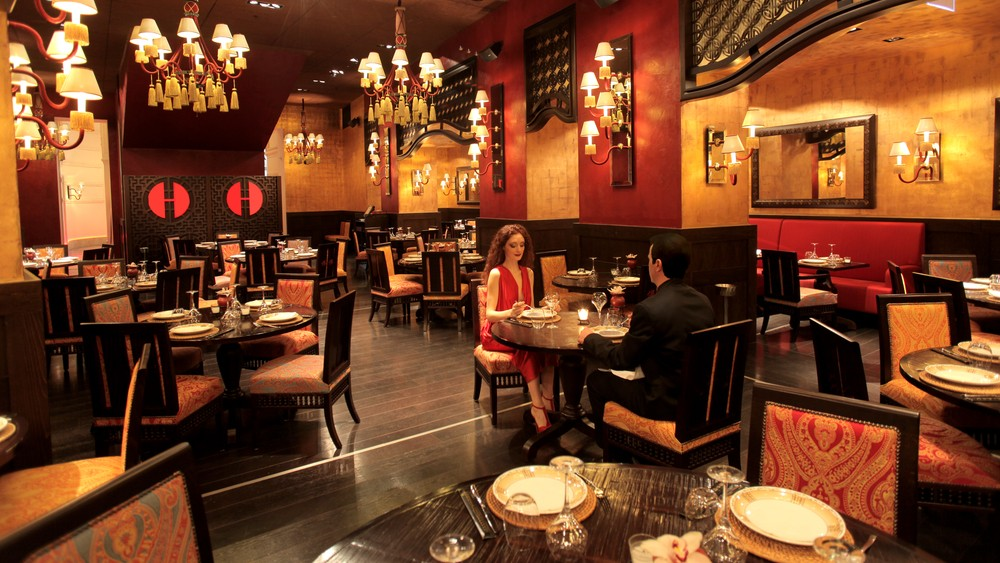

This project aims to use the restaurant tips dataset to practice creating composition plots and visualizations. We will examine the relationship between different variables and the tips given.

The dataset consists of information from 244 restaurant bills, collected in the US in 1987.

It includes details about the tips given to restaurant staff, such as the total bill, tip amount, gender of the person paying, smoking status, day of the week, time of day, and party size.

## **👣 The First Steps**

### **📥 Data import**

First, let's import the needed libraries: Pandas & Matplotlib.

In [1]:
# PUT YOUR CODE HERE
import pandas as pd
import matplotlib.pyplot as plt

Then load data from the following link: https://raw.githubusercontent.com/RusAbk/sca_datasets/main/tips.csv

In [2]:
# PUT YOUR CODE HERE
df = pd.read_csv('https://raw.githubusercontent.com/RusAbk/sca_datasets/main/tips.csv')

### **🔍 Data exploration**

#### **Test sample**

Let's take a look at the first 5 rows to be sure, that data is loaded properly:

In [3]:
# PUT YOUR CODE HERE
df.head()

,id,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


> 🎉 Great! It seems to be okay.

As you can see each observation represents a customer who left a tip at a restaurant.

We can see information about:
* the day it occurred
* if it was at lunch or dinner
* the total bill
* the sex of the person
* if they were a smoker or not
* the size of the party

Before continuing take a look at a few rows of the data and use `info` and `describe` to analyze dataset column types and values.

#### **Column types checking**

Show the columns of the dataframe and their types:

In [4]:
# PUT YOUR CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          244 non-null    int64  
 1   total_bill  244 non-null    float64
 2   tip         244 non-null    float64
 3   sex         244 non-null    object 
 4   smoker      244 non-null    object 
 5   day         244 non-null    object 
 6   time        244 non-null    object 
 7   size        244 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB


> **Ooops... 🤔**
>
> We have string columns considered as objects.

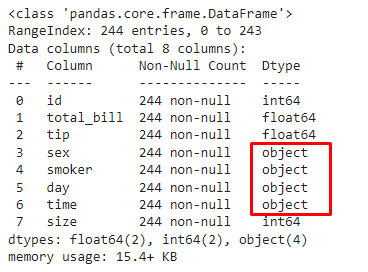

Let's fix their types and make them string:

In [29]:
# PUT YOUR CODE HERE
df1 = df.convert_dtypes()

Check again (output columns and their types):

In [30]:
# PUT YOUR CODE HERE
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          244 non-null    Int64  
 1   total_bill  244 non-null    Float64
 2   tip         244 non-null    Float64
 3   sex         244 non-null    string 
 4   smoker      244 non-null    string 
 5   day         244 non-null    string 
 6   time        244 non-null    string 
 7   size        244 non-null    Int64  
dtypes: Float64(2), Int64(2), string(4)
memory usage: 16.3 KB


Nice! We finished this. Look like we are ready to explore some statistics on the given data.

#### **Basic descriptive statistics**

Show a descriptive statistics of the numeric columns:

In [31]:
# PUT YOUR CODE HERE
df1.describe()

,id,total_bill,tip,size
count,244.0,244.0,244.0,244.0
mean,121.5,19.785943,2.998279,2.569672
std,70.580923,8.902412,1.383638,0.9511
min,0.0,3.07,1.0,1.0
25%,60.75,13.3475,2.0,2.0
50%,121.5,17.795,2.9,2.0
75%,182.25,24.1275,3.5625,3.0
max,243.0,50.81,10.0,6.0


Great! Now we know a little more about our data.

➡️ Let's move forward!

## **💸 Tip value influencers**

### **🚬 Do weekends bring more tips?**

Let's figure out the difference between smokers and non-smokers in terms of their behavior and purchasing habits in public catering establishments.

#### **Separate weekends and Other**

Create a new dataframe `weekend_df` containing only info about weekends.

In [49]:
# PUT YOUR CODE HERE
weekend_df = df1.query('day =="Sun" or day =="Sat"')

Check whether everything is okay. Output a test sample (5 random rows):

In [50]:
# PUT YOUR CODE HERE
weekend_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
24,24,19.82,3.18,Male,No,Sat,Dinner,2
11,11,35.26,5.0,Female,No,Sun,Dinner,4
159,159,16.49,2.0,Male,No,Sun,Dinner,4
8,8,15.04,1.96,Male,No,Sun,Dinner,2
73,73,25.28,5.0,Female,Yes,Sat,Dinner,2


Also create another one dataframe `others_df` containing only others.

In [34]:
# PUT YOUR CODE HERE
others_df = df1.query('not (day == "Sat" or day == "Sun")')

Check whether everything is okay. Output a test sample (5 random rows):

In [35]:
# PUT YOUR CODE HERE
others_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
96,96,27.28,4.0,Male,Yes,Fri,Dinner,2
146,146,18.64,1.36,Female,No,Thur,Lunch,3
135,135,8.51,1.25,Female,No,Thur,Lunch,2
121,121,13.42,1.68,Female,No,Thur,Lunch,2
148,148,9.78,1.73,Male,No,Thur,Lunch,2


#### **Compare their measures of central tendency**

As we know, measures of central tendency is one of the basic tools, that allow us to compare different datasets as it shows the most typical values.

##### **🌏 Whole dataset**

Let's try to calculate measures of central tendency for the whole dataset first.

Calculate them for the **'tip'** column through the whole dataset and save them into the following variables:

* min => `common_tip_min`
* max => `common_tip_max`
* mean => `common_tip_mean`
* median => `common_tip_median`

In [36]:
# YOUR CODE
common_tip_min = df1['tip'].min()
common_tip_max = df1['tip'].max()
common_tip_mean = df1['tip'].mean()
common_tip_median = df1['tip'].median()

Let's show the resulting values for whole dataset (we already have the code written for you 😉)

In [37]:
# Make a list of values
common_values = [common_tip_min, common_tip_max, common_tip_mean, common_tip_median]
# Round all the values to 4 decimal places
common_values = map(lambda x: round(x, 4), common_values)

# Make a dataframe from the list
common_mct = pd.DataFrame(common_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
common_mct

,0
min,1.0000
max,10.0000
mean,2.9983
median,2.9000


##### **🚬 Weekends**

Do the same taking into account only weekends. Use the following variables:

* min => `weekends_tip_min`
* max => `weekends_tip_max`
* mean => `weekends_tip_mean`
* median => `weekends_tip_median`

In [51]:
# YOUR CODE
weekends_tip_min = weekend_df['tip'].min()
weekends_tip_max = weekend_df['tip'].max()
weekends_tip_mean = weekend_df['tip'].mean()
weekends_tip_median = weekend_df['tip'].median()

Let's output the results in the same format.

Make the same dataframe containing the measures of central tendency for smokers as we did for whole dataset. Then output it.

In [52]:
# YOUR CODE
common_values = [weekends_tip_min, weekends_tip_max, weekends_tip_mean, weekends_tip_median]
# Round all the values to 4 decimal places
common_values = map(lambda x: round(x, 4), common_values)

# Make a dataframe from the list
common_mct = pd.DataFrame(common_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
common_mct

,0
min,1.0000
max,10.0000
mean,3.1153
median,3.0000


##### **🚭 others**

Now repeat it for others. Use the following variables:

* min => `others_tip_min`
* max => `others_tip_max`
* mean => `others_tip_mean`
* median => `others_tip_median`

In [42]:
# YOUR CODE
others_tip_min = others_df['tip'].min()
others_tip_max = others_df['tip'].max()
others_tip_mean = others_df['tip'].mean()
others_tip_median = others_df['tip'].median()

Make the same dataframe containing the measures of central tendency for others as we did for whole dataset. Then output it.

In [43]:
# YOUR CODE
common_values = [others_tip_min, others_tip_max, others_tip_mean, others_tip_median]
# Round all the values to 4 decimal places
common_values = map(lambda x: round(x, 4), common_values)

# Make a dataframe from the list
common_mct = pd.DataFrame(common_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
common_mct


,0
min,1.0000
max,6.7000
mean,2.7628
median,2.5000


##### **📝 Conclusion**

Let's show the retrieved results together (we already have the code written for you 😉):

In [46]:
all_vals_dict = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'weekends': {'min': weekends_tip_min, 'max': weekends_tip_max, 'mean': weekends_tip_mean, 'median': weekends_tip_median},
    'others': {'min': others_tip_min, 'max': others_tip_max, 'mean': others_tip_mean, 'median': others_tip_median}
}

# Make a dataframe
all_mct = pd.DataFrame(all_vals_dict)
# Output the dataframe
all_mct

,Common,weekends,others
min,1.000000,1.000000,1.00000
max,10.000000,10.000000,6.70000
mean,2.998279,3.115276,2.76284
median,2.900000,3.000000,2.50000


**Insights based on measures of central tendency comparison:**

---

1. Insight 1
- The average tip (mean) on weekends is higher (≈ 3.12) than on weekdays (≈ 2.76), suggesting that customers tend to give more generous tips during weekends.
The median tip is also higher on weekends (3.0 vs 2.5), which shows that this trend is not merely due to a few large outliers.
2. Insight 1
- The maximum tip on weekends reaches 10.0, significantly higher than the maximum on weekdays (6.7), indicating that larger individual tips are more likely to occur during weekends.

**General conclusion:**

&#8658; Tips given during weekends are generally higher than those on weekdays, as reflected in all central tendency measures (mean, median, and max). This suggests that weekend dining may be associated with more generous tipping behavior.

#### **Look at histograms**

As we already discussed on the last lecture, there are a lot of cases, when comparing the measures of central tendency is not enough.

This is because they only show the most typical values. However, the way data is distributed is equally important. There are situations where measures of central tendency are exactly the same, but due to different distributions, it is incorrect to say that the datasets are similar.

##### **🌏 Whole dataset tips histogram**

Plot the histogram for the whole dataset tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#74b9ff`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Whole dataset tip values`
* Gridlines: `show`

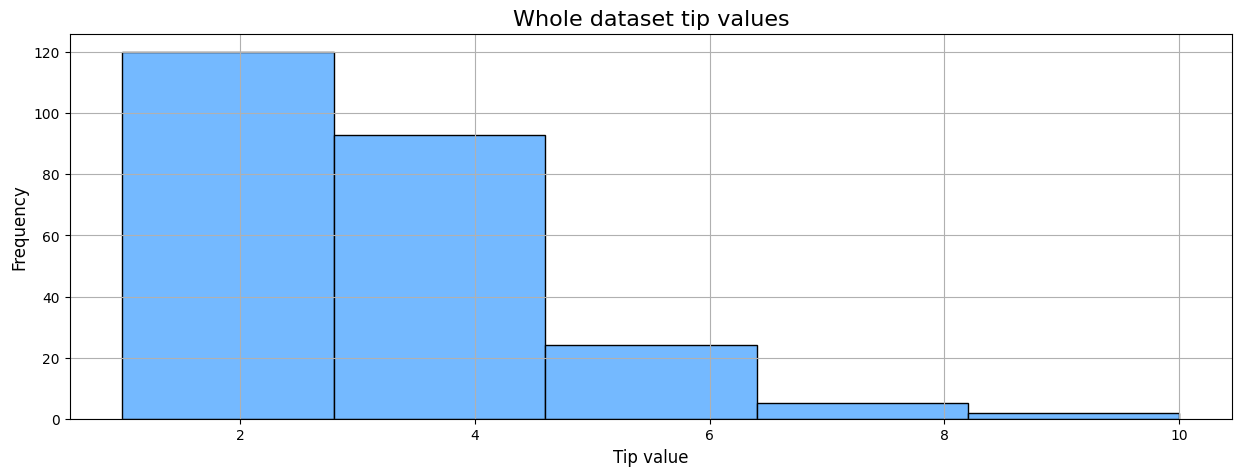

In [53]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(df1['tip'], bins=5, color='#74b9ff', edgecolor='black')
plt.xlabel('Tip value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Whole dataset tip values', fontsize=16)
plt.grid(True)
plt.show()

##### **🚬 Smokers tips histogram**

Plot the histogram for weekends tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#ff7675`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `weekends tip values`
* Gridlines: `show`

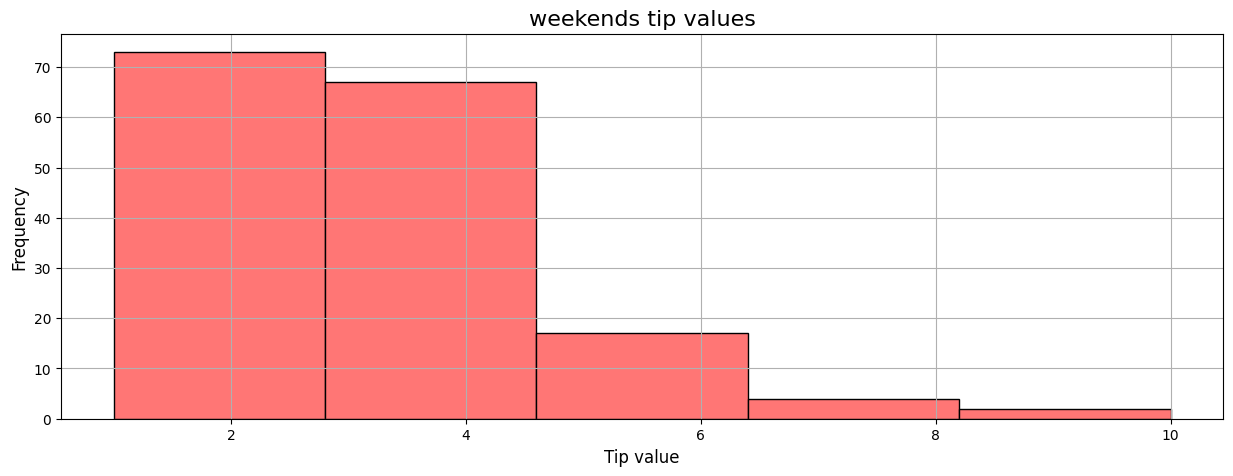

In [56]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(weekend_df['tip'], bins=5, color='#ff7675', edgecolor='black')


plt.xlabel('Tip value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('weekends tip values', fontsize=16)


plt.grid(True)


plt.show()


##### **🚭 others tips histogram**

Plot the histogram for others tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#55efc4`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `others tip values`
* Gridlines: `show`

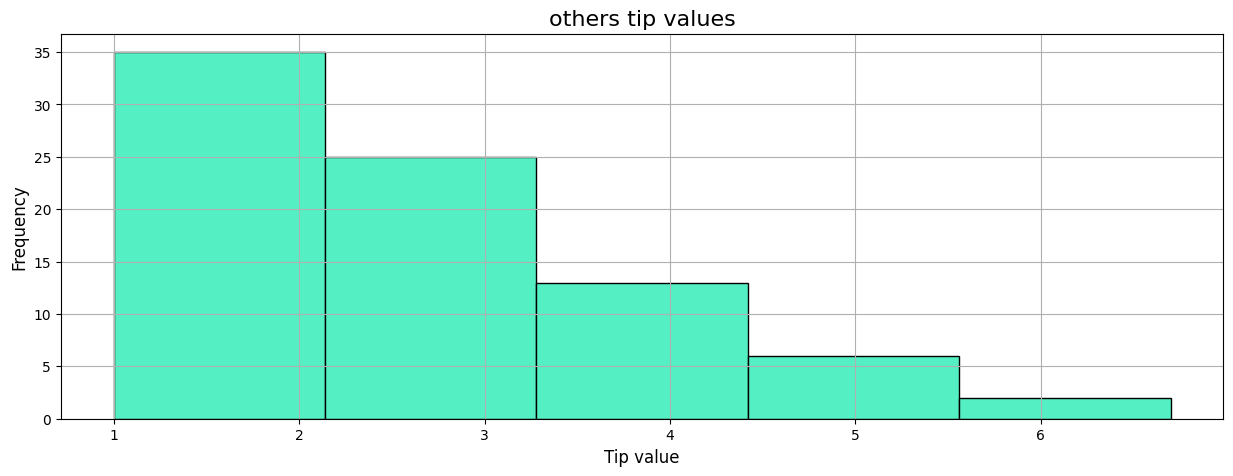

In [58]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(others_df['tip'], bins=5, color='#55efc4', edgecolor='black')
plt.xlabel('Tip value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('others tip values', fontsize=16)
plt.grid(True)
plt.show()

##### **⭐ Extra-task with a higher difficulty**

Plot all 3 charts in a row in the same cell:

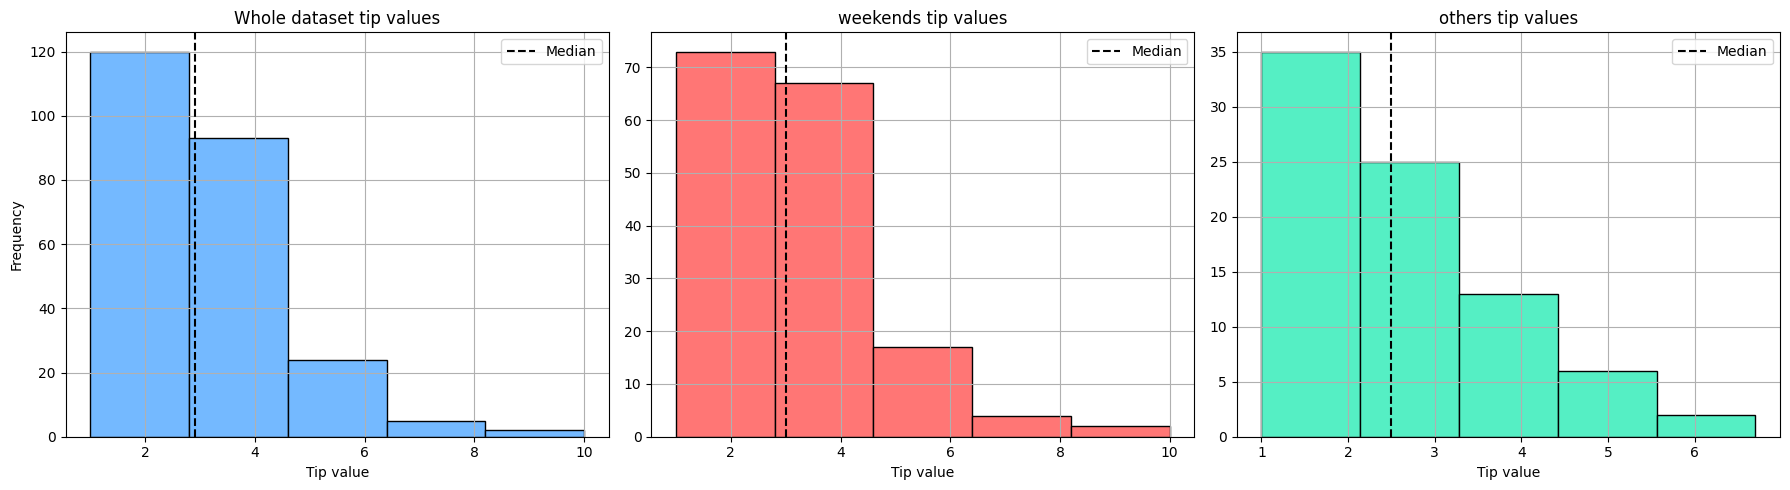

In [59]:
# YOUR CODE
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Whole dataset
axs[0].hist(df1['tip'], bins=5, color='#74b9ff', edgecolor='black')
axs[0].axvline(df1['tip'].median(), color='black', linestyle='--', label='Median')
axs[0].set_title('Whole dataset tip values')
axs[0].set_xlabel('Tip value')
axs[0].set_ylabel('Frequency')
axs[0].grid(True)
axs[0].legend()

# Smokers
axs[1].hist(weekend_df['tip'], bins=5, color='#ff7675', edgecolor='black')
axs[1].axvline(weekend_df['tip'].median(), color='black', linestyle='--', label='Median')
axs[1].set_title('weekends tip values')
axs[1].set_xlabel('Tip value')
axs[1].grid(True)
axs[1].legend()

# Non-smokers
axs[2].hist(others_df['tip'], bins=5, color='#55efc4', edgecolor='black')
axs[2].axvline(others_df['tip'].median(), color='black', linestyle='--', label='Median')
axs[2].set_title('others tip values')
axs[2].set_xlabel('Tip value')
axs[2].grid(True)
axs[2].legend()

plt.tight_layout()
plt.show()

##### **📝 Conclusion**

**Insights based on distribution comparison:**

---

1. Insight 1
- The histogram shows that on weekends, there is a tendency for higher tip amounts compared to other days.
The distribution on weekends is more spread out to the right (indicating higher tips), while the distribution on other days is more concentrated around lower values.
**General conclusion:**

&#8658; Based on the shape of the distributions, tip amounts on weekends tend to be higher, as reflected by the presence of more large values compared to other days.
This supports the previous conclusion drawn from measures of central tendency (mean, median, max).

### **👨👩 Do males give more tips?**

Perform the same steps based on the column **sex**.

### **📆 Do weekends bring more tips?**

Perform the same steps based on the column **day**.

### **🕑 Do dinners bring more tips?**

Perform the same steps based on the column **time**.